In [1]:
import numpy as n
import pandas as p
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn import metrics

In [4]:
#importing data

In [5]:
df=sm.datasets.fair.load_pandas().data

In [6]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
# function to assign 1 for those who had affairs and 0 for those who had not

In [8]:
def affairs(n):
    if n!= 0:
        return 1
    else:
        return 0

In [9]:
df['had_affairs']=df.affairs.apply(affairs)

In [10]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [11]:
lgreg=LogisticRegression()

In [12]:
X=df.drop(['had_affairs','affairs'],axis=1)

In [13]:
Y=df.had_affairs

In [15]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [18]:
lgreg.fit(X_train,Y_train)

C:\Users\GOVIND SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
#prediction for test data set

In [19]:
pred_test=lgreg.predict(X_test)

In [46]:
#prediction for train data set

In [20]:
pred_train=lgreg.predict(X_train)

In [47]:
# coefficient of determination

In [48]:
lgreg.score(X_test,Y_test)

0.7368090452261307

In [22]:
df.groupby('had_affairs').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affairs,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


(array([4313.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2053.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

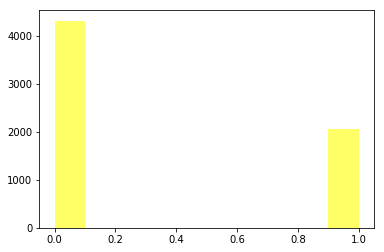

In [64]:
# frequency of having affairs and not having affairs
plt.hist(df['had_affairs'],bins=10,alpha=0.6,color='yellow')


(array([ 139.,    0.,    0., 1800.,    0.,    0.,    0., 1931.,    0.,
           0.,    0., 1069.,    0.,    0.,    0.,  634.,    0.,    0.,
           0.,  793.]),
 array([17.5  , 18.725, 19.95 , 21.175, 22.4  , 23.625, 24.85 , 26.075,
        27.3  , 28.525, 29.75 , 30.975, 32.2  , 33.425, 34.65 , 35.875,
        37.1  , 38.325, 39.55 , 40.775, 42.   ]),
 <a list of 20 Patch objects>)

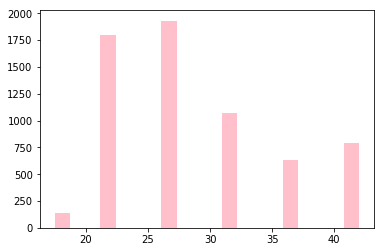

In [61]:
# frequency of ages 
plt.hist(df["age"],bins=20,color="pink")

In [24]:
X=df.drop(['affairs','had_affairs','occupation','occupation_husb'],axis=1)

In [25]:
occ_dummies=p.get_dummies(df.occupation)

In [26]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [27]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [28]:
occ_dummies=occ_dummies.drop('occ1',axis=1)

In [29]:
hus_occ_dummies=p.get_dummies(df.occupation_husb)

In [30]:
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [31]:
x_dummies=p.concat([occ_dummies,hus_occ_dummies],axis=1)

In [32]:
X=p.concat([X,x_dummies],axis=1)

In [33]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,0,1,0,0


In [34]:
lgreg=LogisticRegression()
lgreg.fit(X,Y)

C:\Users\GOVIND SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [39]:
lgreg.fit(X_train,Y_train)

C:\Users\GOVIND SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
pred_train=lgreg.predict(X_train)

In [41]:
pred_test=lgreg.predict(X_test)

In [42]:
lgreg.score(X_test,Y_test)

0.7368090452261307

In [1]:
# we are not getting good accuracy with this model

Text(0.5, 1.0, 'residual plot')

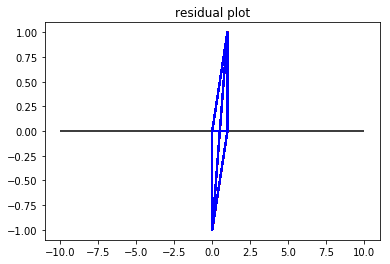

In [66]:
plt.plot(pred_train,(pred_train-Y_train),c='r')
plt.plot(pred_test,(pred_test-Y_test),c='b')
plt.hlines(y=0,xmin=-10,xmax=10)
plt.title("residual plot")